# Assignment 5 

## Grade: /100 pts

This notebook contains the questions for Assignment 5. 

Please note, a random seed has been set (42) to ensure the reproducibility of the results -- *DO NOT* change this random seed. **If you call additional functions that are based on random number generators, you will need to define their seed to 42 as well**. 

Make sure to complete this assignment individually and appropriately reference all external code and documentation used. ***In order for your submission to be valid, you must adhere to the function definitions which have been made (failure to do so will result in a grade of 0). You must upload this completed Jupyter Notebook file as your submission (other file types are not permitted and will result in a grade of 0).*** You are responsible for selecting and importing additional packages.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import time
%matplotlib inline

## Q1: Data loading and Preprocessing (20 pts)

In this assignment we use a dataset (`data.csv`) to diagnose breast cancer as malignant (`M`) or benign (`B`):

- Load the dataset and show the first 5 rows
- Remove `id` from the dataframe
- Remove rows with any null values
- Seperate the target variable `diagnosis` and feature matrix.
* Use label encoder to make the labels numerical (0 and 1 instead of `B` and `M`).
* Split the data and set aside 10 percent of data for testing.
* Print the size of training and test sets.

In [34]:
data = pd.read_csv('data.csv')
data.drop(columns=['id'], inplace=True)
data.dropna(inplace=True)

X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

y = LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(f'Training set size {len(X_train)}')
print(f'Test set size: {len(X_test)}')

# Show 5 first rows (does not work if I put it above)
data.head()

Training set size 512
Test set size: 57


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Q2: Effect of normalization (15 pts)

In order to properly build ML models, the features need to be standardized so that no feature can dominate others in determining the prediction values due to differences in feature scales. 

* Standarize training and test sets and plot the `area_mean` feature before and after the standardization. 

* **Written Answer:** Make observations about the plot.  

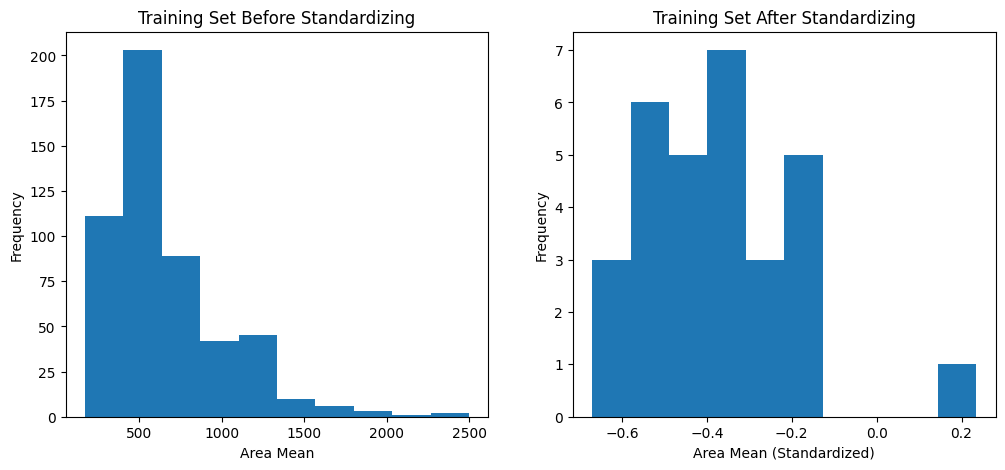

In [35]:
X_train_st = StandardScaler().fit_transform(X_train)
X_test_st = StandardScaler().fit_transform(X_test)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Training Set Before Standardizing')
plt.hist(X_train['area_mean'])
plt.xlabel('Area Mean')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.title('Training Set After Standardizing')
plt.hist(X_train_st[3])
plt.xlabel('Area Mean (Standardized)')
plt.ylabel('Frequency')
plt.show()

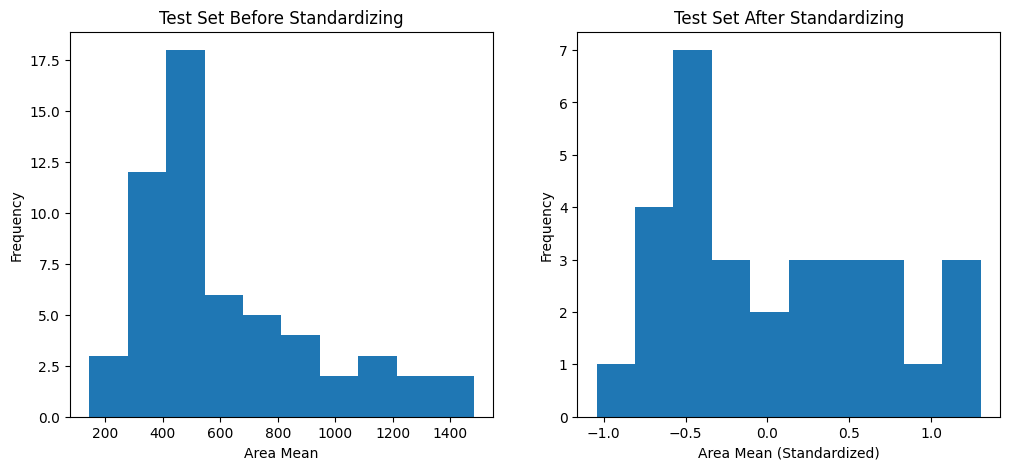

In [36]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Test Set Before Standardizing')
plt.hist(X_test['area_mean'])
plt.xlabel('Area Mean')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.title('Test Set After Standardizing')
plt.hist(X_test_st[3])
plt.xlabel('Area Mean (Standardized)')
plt.ylabel('Frequency')
plt.show()

**Written Answer:** The histogram shows that the data before being standardized is skewed to one end, and afterward the distribution is closer to normal.

## Q3: Classification model1 (15 pts)

* Fit a logistic regression model (model1) to the normalized training data and report the training time.
* Report the accuracy and recall for model1's predictions. 

In [37]:
model1 = LogisticRegression(random_state=42)
t0 = time.time()
model1.fit(X_train_st, y_train)
t1 = time.time()

y_pred = model1.predict(X_test_st)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Model took {t1 - t0} sec to train')
print(f'Accuracy score: {accuracy}')
print(f'Recall score: {recall}')

Model took 0.015965938568115234 sec to train
Accuracy score: 0.9649122807017544
Recall score: 0.9411764705882353


## Q4: PCA (15 pts)

In this task:

- Use the normalized training data and plot the explained variance ratio for the data.
- **Written Answer** Use that plot to choose the proper number of principal components (PCs) which can explain at least 70% of the total variance in the training data. Report the number of your choice and explain how you have chosen that number?

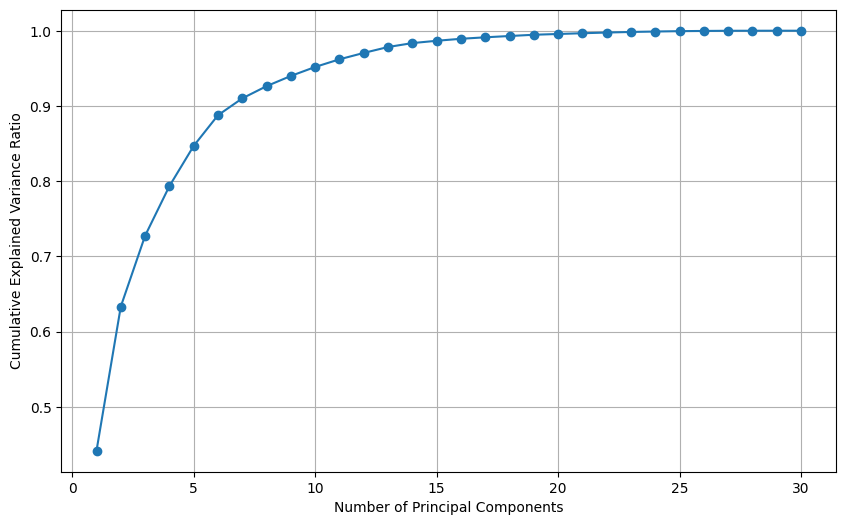

In [38]:
pca = PCA().fit(X_train_st)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

**Written Answer:** By looking at the points on the graph you can see that the number of principal components that will give at least 70% cumulative explained variance ratio is 3.

## Q5: Dimensionality Reduction (15 pts)

* Project the scaled training data using PCA with the dimension of 2. 
* Plot the projected training dataponts on the PCs and show different labels with two different colors. 

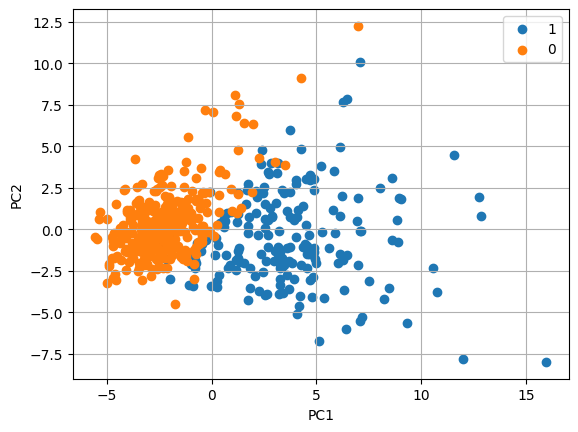

In [39]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_st)
df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
df['target'] = y_train

for target in df['target'].unique():
    subset = df[df['target'] == target]
    plt.scatter(subset['PC1'], subset['PC2'], label=target)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

## Q6: Classification model2 (on compressed data) (20 pts)

* Fit a new logistic regression model (model2) and fit it to the compressed training data from Q5 and report the training time.
* Project the normalized test set using PCA model you created in Q5 and report the accuracy and recall for model2's prediction. 
* **Written Answer** compare two models (model1 and model2) in terms of training time and prediction results. What do you conclude?

In [40]:
t0 = time.time()
model2 = LogisticRegression(random_state=42)
model2.fit(X_train_pca, y_train)
t1 = time.time()

X_test_pca = pca.transform(X_test_st)
y_pred2 = model2.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)

print(f'Model took {t1 - t0} sec to train')
print(f'Accuracy score: {accuracy}')
print(f'Recall score: {recall}')

Model took 0.006154060363769531 sec to train
Accuracy score: 0.9473684210526315
Recall score: 0.9411764705882353


**Written Answer:** The scores for model 2 are slightly lower, however model2 took less time to train.